In [2]:
import tensorflow as tf
from tensorflow import keras
from google.colab import drive
from google.colab import files
import numpy as np
import os
import PIL
from PIL import Image
import tensorflow_datasets as tfds
from zipfile import ZipFile
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.losses import categorical_crossentropy
import sklearn
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
filename = "/content/gdrive/MyDrive/real_world_test_12_images.zip"
with ZipFile(filename, "r",) as zip:
  zip.extractall()

In [4]:
filename = "/content/gdrive/MyDrive/emotion_data_happy_sad.zip"
with ZipFile(filename, "r",) as zip:
  zip.extractall()

In [5]:
filename = "/content/gdrive/MyDrive/2x_emotion_data_happy_sad.zip"
with ZipFile(filename, "r",) as zip:
  zip.extractall()

In [6]:
filename = "/content/gdrive/MyDrive/archive.zip"
with ZipFile(filename, "r",) as zip:
  zip.extractall('emotion_data')

In [7]:

test_dir = '/content/real_world_test_12_images'

BATCH_SIZE = 20
IMG_SIZE = (48, 48)

test_dataset_real = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=False,
                                                                 batch_size=200,
                                                                 image_size=IMG_SIZE, 
                                                           )

Found 12 files belonging to 2 classes.


In [8]:
test_batchs = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory='/content/emotion_data_happy_sad/test',
    target_size=(48,48),
    batch_size=20,
    shuffle=False,
    #class_mode = 'binary',

)

train_dir = '/content/emotion_data_happy_sad/train'
validation_dir = '/content/emotion_data_happy_sad/valid'
test_dir = '/content/emotion_data_happy_sad/test'

BATCH_SIZE = 20
IMG_SIZE = (48, 48)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=False,
                                                                 batch_size=200,
                                                                 image_size=IMG_SIZE, 
                                                           )

Found 200 images belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [9]:
test_batchs_2x = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory='/content/2x_emotion_data_happy_sad/test',
    target_size=(96,96),
    batch_size=20,
    shuffle=False
    #class_mode = 'binary',
    #color_mode='grayscale'
)

#train_dir = '/content/emotion_data_happy_sad/train'
#validation_dir = '/content/emotion_data_happy_sad/valid'
test_dir_2x = '/content/2x_emotion_data_happy_sad/test'

BATCH_SIZE = 20
IMG_SIZE = (96, 96)

test_dataset_2x = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=False,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE,
                                                           )

Found 200 images belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [10]:
archive_test_batchs = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory='/content/emotion_data/test',
    target_size=(48,48),
    batch_size=20,
    shuffle=False,
    class_mode = 'categorical'
    #color_mode='grayscale'
)

#train_dir = '/content/emotion_data_happy_sad/train'
#validation_dir = '/content/emotion_data_happy_sad/valid'
archive_test_dir = '/content/emotion_data/test'

BATCH_SIZE = 20
IMG_SIZE = (48, 48)

archive_test_dataset = tf.keras.utils.image_dataset_from_directory(archive_test_dir,
                                                                 shuffle=False,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE,
                                                                 color_mode = 'grayscale'
                                                           )

Found 7178 images belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [11]:
# from keras.initializers import glorot_uniform
# #Reading the model from JSON file
# with open("/content/gdrive/MyDrive/Colab Notebooks/emotion_models/testModel.json", 'r') as json_file:
#     json_savedModel= json_file.read()
# #load the model architecture 
# json_model = tf.keras.models.model_from_json(json_savedModel)




In [12]:
loaded_model = tf. keras. models. load_model("/content/gdrive/MyDrive/Colab Notebooks/models/vgg_emotion_binary_fine_tune_save1")
#json_model = tf. keras. models. model_from_json(json) 

In [13]:
# #json_model.load_weights("/content/gdrive/MyDrive/Colab Notebooks/emotion_models/fer.h5")
# json_model.compile(loss=categorical_crossentropy,
#               optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
#               # metrics=['accuracy'])
# #test_data = tf.keras.utils.to_categorical(archive_test_batchs,7)
# json_model.evaluate(archive_test_batchs)

In [14]:
# loaded_model2 = keras.models.load_model("/content/gdrive/MyDrive/Colab Notebooks/emotion_models/ResNet-50.h5")

In [15]:
# predictions2 = loaded_model2.predict(archive_test_dataset)

In [16]:
# average_layer = tf.keras.layers.GlobalAveragePooling2D()

# inputs = tf.keras.layers.Input(shape=(48,48,1))
# x = json_model(inputs)
# j_model = tf.keras.Model(inputs = inputs ,outputs = x)
# j_model.summary()

In [17]:
# j_model.compile(loss=categorical_crossentropy,
#               optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
#               metrics=['accuracy'])
# json_model.fit(archive_test_dataset)

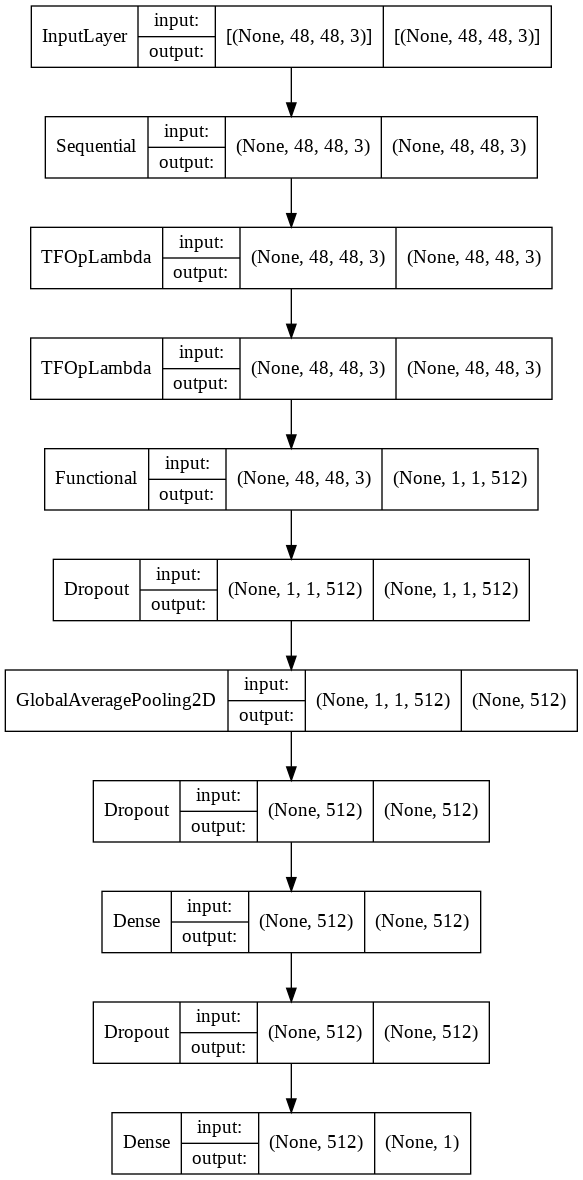

In [18]:
from keras.utils.vis_utils import plot_model

plot_model(loaded_model, show_shapes=True, show_layer_names=False)

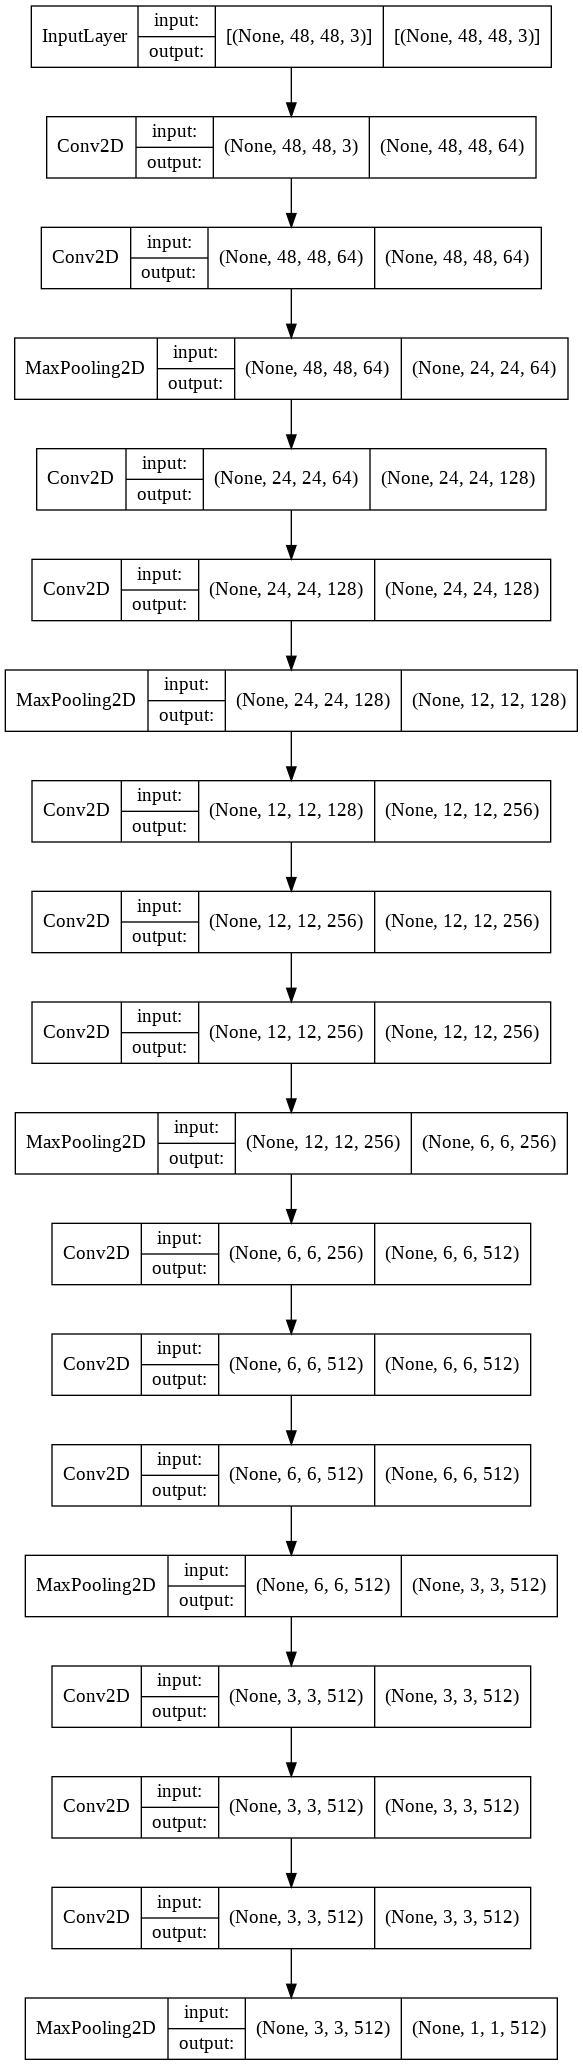

In [19]:
plot_model(loaded_model.layers[4], show_shapes=True, show_layer_names=False)

In [20]:
test_labels = test_batchs.classes
predictions=loaded_model.predict(x=test_dataset,verbose=0)

loaded_model.evaluate(test_dataset)

1/1 [==============================] - 1s 985ms/step - loss: 0.2306 - accuracy: 0.9200


[0.2305564284324646, 0.9200000166893005]

In [21]:
loaded_model.evaluate(test_dataset_real)

1/1 [==============================] - 0s 283ms/step - loss: 0.1902 - accuracy: 0.9167


[0.19017286598682404, 0.9166666865348816]

In [22]:
loaded_model.predict(test_dataset_real)

array([[0.3354834 ],
       [0.0077595 ],
       [0.23900247],
       [0.23907162],
       [0.001759  ],
       [0.0135351 ],
       [0.9823148 ],
       [0.97380733],
       [0.9581079 ],
       [0.9842221 ],
       [0.86153644],
       [0.34933004]], dtype=float32)

In [23]:
def find_Threshold_sad():
  idealThreshold = 0
  highestLength = 0
  for i in range(1,1000):
    threshold = i/1000
    cm = confusion_matrix(y_true=test_labels,y_pred=predictions>threshold)
    L = abs(complex(cm[0][0],cm[1][1]))
    if (L > highestLength and cm[0][0]<cm[1][1]):
      highestLength = L
      idealThreshold = threshold
  return idealThreshold
def find_Threshold_happy():
  idealThreshold = 0
  highestLength = 0
  for i in range(1,1000):
    threshold = i/1000
    cm = confusion_matrix(y_true=test_labels,y_pred=predictions>threshold)
    L = abs(complex(cm[0][0],cm[1][1]))
    if (L > highestLength and cm[0][0]>cm[1][1]):
      highestLength = L
      idealThreshold = threshold
  return idealThreshold
def find_Threshold_equal():
  idealThreshold = 0
  highestLength = 0
  lowestDifference = 100
  for i in range(1,1000):
    threshold = i/1000
    cm = confusion_matrix(y_true=test_labels,y_pred=predictions>threshold)
    L = abs(complex(cm[0][0],cm[1][1]))
    difference = abs(cm[0][0] - cm[1][1])
    if (difference < lowestDifference):
      highestLength = L
      lowestDifference = difference
      idealThreshold = threshold
  return idealThreshold

In [24]:
ht = find_Threshold_happy()
print(ht)
cm_happy = confusion_matrix(y_true=test_labels,y_pred=predictions>ht, normalize='true')
mat_happy = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm_happy,display_labels=np.array(['happy','sad']))

st = find_Threshold_sad()
print(st)
cm_sad = confusion_matrix(y_true=test_labels,y_pred=predictions>st)
mat_sad = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm_sad,display_labels=np.array(['happy','sad']))

et = find_Threshold_equal()
print(et)
cm_equal = confusion_matrix(y_true=test_labels,y_pred=predictions>et)


#hi
mat_equal = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm_equal,display_labels=np.array(['happy','sad']))

0.574
0.277
0.436


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


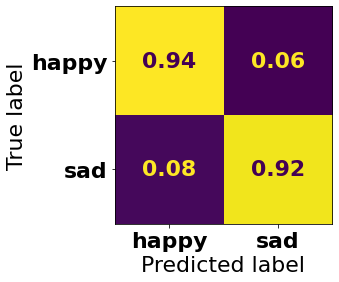

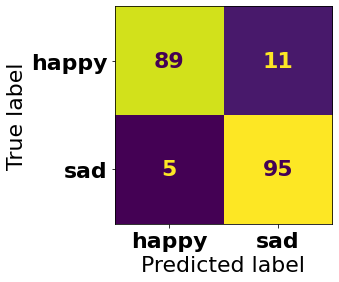

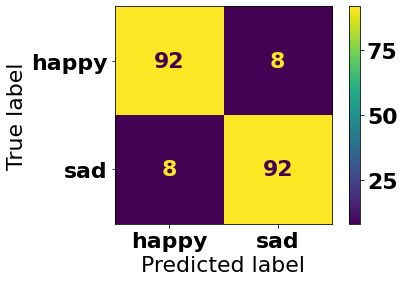

In [25]:
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)
mat_happy.plot(colorbar=False)
mat_sad.plot(colorbar=False)
mat_equal.plot()

In [26]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 48, 48, 3)         0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 48, 48, 3)        0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 48, 48, 3)        0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 1, 1, 512)         0     

In [27]:
test_batchs.class_indices

{'happy': 0, 'sad': 1}

In [28]:
predictions = predictions.flatten()
for i in range (len(predictions)):
  k = predictions[i] + test_labels[i]

#plt.plot(range(200),predictions,'o')
#plt.plot([0,200],[ht,ht])



In [29]:
from scipy.sparse import csc
class_names = test_dataset.class_names

plt.figure(figsize=(10, 10))
confident_happy = []
confident_sad = []

false_happy = []
false_sad = []
for images, labels in test_dataset:
  minSad = 1
  minHappy = 1
  maxSad = 0
  maxHappy = 0
  for i in range(200):
    prediction = loaded_model.predict(np.expand_dims(images[i], axis=0))
    p = prediction[0][0]
    if (p<minHappy and labels[i]==0):
      minHappy = p
      confident_happy.append((i,prediction))
    if (p>maxSad and labels[i]==1):
      maxSad = p
      confident_sad.append((i,prediction))
    if (prediction[0][0]<minSad and labels[i]==1):
      minSad = p
      false_happy.append((i,prediction))
    if (prediction[0][0]>maxHappy and labels[i]==0):
      maxHappy = p
      false_sad.append((i,prediction))



<Figure size 720x720 with 0 Axes>

In [30]:
for images, labels in test_dataset:
  ch, p1 = confident_happy[-1]
  cs, p2 = confident_sad[-1]
  fh, p3 = false_happy[-1]
  fs, p4 = false_sad[-1]
  
  p1 = p1.flatten()[0]
  p2 = p2.flatten()[0]
  p3 = p3.flatten()[0]
  p4 = p4.flatten()[0]


(-0.5, 47.5, 47.5, -0.5)

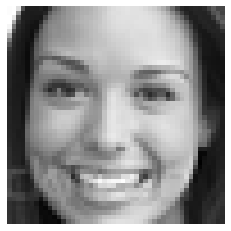

In [31]:
  #ax = plt.subplot(1,2,1)
plt.imshow(images[ch].numpy().astype("uint8"))
  #plt.title(str(round(p1, 4)))
plt.axis("off")

(-0.5, 47.5, 47.5, -0.5)

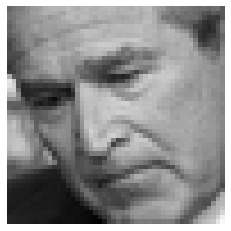

In [32]:

  #ax = plt.subplot(1,2,2)
plt.imshow(images[cs].numpy().astype("uint8"))
  #plt.title(str(round(p2, 4)))
plt.axis("off")

(-0.5, 47.5, 47.5, -0.5)

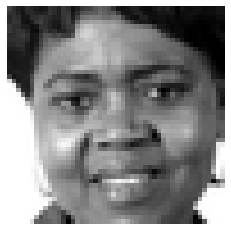

In [33]:
#ax = plt.subplot(1,2,1)
plt.imshow(images[fh].numpy().astype("uint8"))
#plt.title(str(round(p3, 4)))
plt.axis("off")


(-0.5, 47.5, 47.5, -0.5)

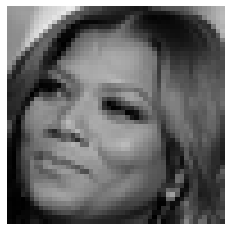

In [34]:
#ax = plt.subplot(1,2,2)
plt.imshow(images[fs].numpy().astype("uint8"))
#plt.title(str(round(p4, 4)))
plt.axis("off")

In [35]:
ch, chp = confident_happy[2]

In [36]:
chp.flatten()[0]

0.00029525845